# Week 9: Deep Learning

# Objective

The objective of this project is to use Artificial Neural Network (ANN) models to recognize own's handwritten digits base from the MNIST dataset. 


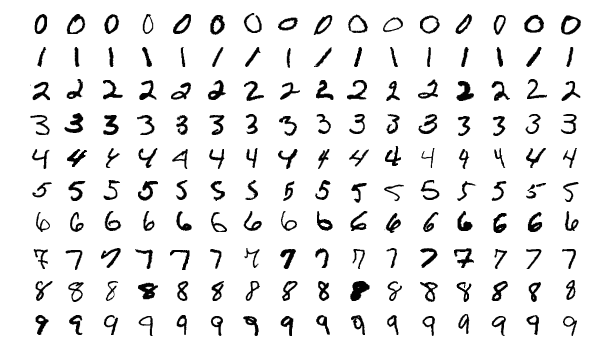



# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import datetime
import keras
import cv2

from IPython import display
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

from matplotlib import pyplot as plt

from os import listdir

# Dataset

## Train-Test Split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Shape of Train and Test vectors

In [3]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


## Plot Data

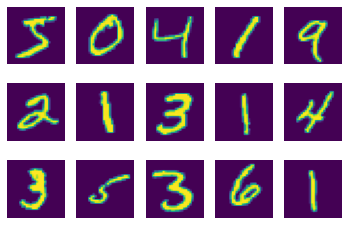

In [4]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

# Train a Neural Network with Keras

In [5]:
X_train[0].shape, X_train[0].reshape(-1)
#plt.imshow(X_train[7])

((28, 28),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   

In [6]:
print(X_train[0].reshape(-1).shape, \
      X_train[0].reshape(28*28).shape,\
      X_train[0].reshape(784).shape, 
      X_train[0].flatten().shape)

(784,) (784,) (784,) (784,)


In [7]:
keras.utils.to_categorical(y_train[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(keras.layers.Dense(units=64,
                           activation=keras.activations.relu,
                            name='hidden_layer'))

model.add(keras.layers.Dense(units=10, 
                           activation=keras.activations.softmax,
                            name='output_layer'))


model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 64)                50240     
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train,
                keras.utils.to_categorical(y_train),
                epochs=100,
                batch_size=512,
                validation_split=0.3)

Epoch 1/100
83/83 [==============================] - 1s 11ms/step - loss: 47.1983 - accuracy: 0.5187 - val_loss: 4.1406 - val_accuracy: 0.8319
Epoch 2/100
83/83 [==============================] - 1s 7ms/step - loss: 3.3955 - accuracy: 0.8399 - val_loss: 2.3382 - val_accuracy: 0.8486
Epoch 3/100
83/83 [==============================] - 1s 7ms/step - loss: 1.8290 - accuracy: 0.8612 - val_loss: 1.5846 - val_accuracy: 0.8437
Epoch 4/100
83/83 [==============================] - 1s 7ms/step - loss: 1.1980 - accuracy: 0.8566 - val_loss: 1.1906 - val_accuracy: 0.8528
Epoch 5/100
83/83 [==============================] - 1s 7ms/step - loss: 0.8637 - accuracy: 0.8620 - val_loss: 0.9635 - val_accuracy: 0.8583
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 0.6814 - accuracy: 0.8680 - val_loss: 0.8462 - val_accuracy: 0.8677
Epoch 7/100
83/83 [==============================] - 1s 7ms/step - loss: 0.5548 - accuracy: 0.8877 - val_loss: 0.7965 - val_accuracy: 0.8792
Epoch 8/100

83/83 [==============================] - 1s 9ms/step - loss: 0.0959 - accuracy: 0.9754 - val_loss: 0.5335 - val_accuracy: 0.9366
Epoch 59/100
83/83 [==============================] - 1s 9ms/step - loss: 0.0655 - accuracy: 0.9802 - val_loss: 0.5252 - val_accuracy: 0.9401
Epoch 60/100
83/83 [==============================] - 1s 9ms/step - loss: 0.0714 - accuracy: 0.9789 - val_loss: 0.5349 - val_accuracy: 0.9416
Epoch 61/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.5260 - val_accuracy: 0.9407
Epoch 62/100
83/83 [==============================] - 1s 11ms/step - loss: 0.0604 - accuracy: 0.9824 - val_loss: 0.5193 - val_accuracy: 0.9403
Epoch 63/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.5312 - val_accuracy: 0.9400
Epoch 64/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0932 - accuracy: 0.9744 - val_loss: 0.5071 - val_accuracy: 0.9423
Epoch 65/100
83

<AxesSubplot:>

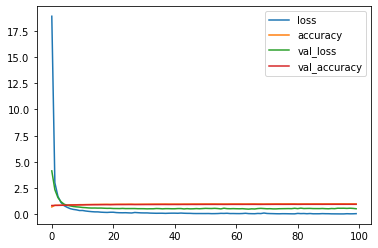

In [16]:
pd.DataFrame(history.history).plot()

# Hyperparameters of Neural Network

In [17]:
model_students = keras.models.Sequential()
model_students.add(keras.layers.Flatten(input_shape=(28, 28)))
model_students.add(keras.layers.Dense(units=16,
                           activation=keras.activations.relu,
                            name='hidden_one'))
model.add(keras.layers.Dropout(0.2))

In [18]:
model.add(keras.layers.BatchNormalization(axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None))


model_students.add(keras.layers.Dense(units=10, activation=keras.activations.softmax,name='output'))


model_students.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [19]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=5,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False)

<AxesSubplot:>

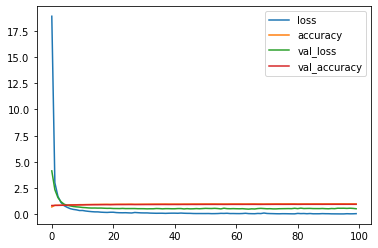

In [20]:
pd.DataFrame(history.history).plot()

# Train a Convolutional Neural Network

In [21]:
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
K.clear_session()
model = Sequential()

#First layer
model.add(Conv2D(6, kernel_size=(5, 5), padding="same", strides = (1,1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())

#Second layer
model.add(Conv2D(16, kernel_size=(5, 5), strides = (1,1), activation='relu'))
model.add(MaxPooling2D())

#Third layer
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(84))
model.add(Activation('relu'))

#Output layer 
model.add(Dense(10))
model.add(Activation('softmax'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
activation (Activation)      (None, 120)               0

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3697 - accuracy: 0.8823
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0650 - accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0459 - accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0366 - accuracy: 0.9893
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0332 - accuracy: 0.99020s - loss: 0.033


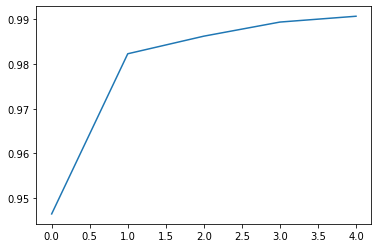

In [27]:
plt.plot(history.history['accuracy'])

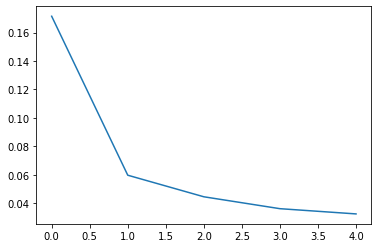

In [28]:
plt.plot(history.history['loss'])

In [29]:
model.evaluate(x=X_test, y=y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0354 - accuracy: 0.9893


[0.03540033847093582, 0.989300012588501]

Prediction 4


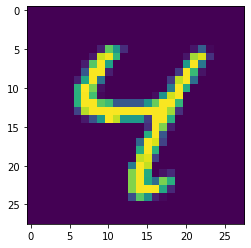

In [30]:
p=model.predict(X_test[6:7])
print(f'Prediction {p.argmax()}')
plt.imshow(X_test[6:7].reshape(28,28))

# Predict Own's Handwriting

In [31]:
plt.rcParams['figure.figsize'] = (10,38)

In [32]:
def predict(img, i):
    image = img.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   
    image = cv2.resize(image, (28, 28))

    image = image.astype('float64')#float32
    image = image.reshape(1, 28, 28, 1)
    #image /= 255

    pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
    plt.subplot(15,2,i)
    plt.tight_layout()
    plt.imshow(img)
    title = f"Predicted Number: {pred.argmax()}"
    plt.title(title)

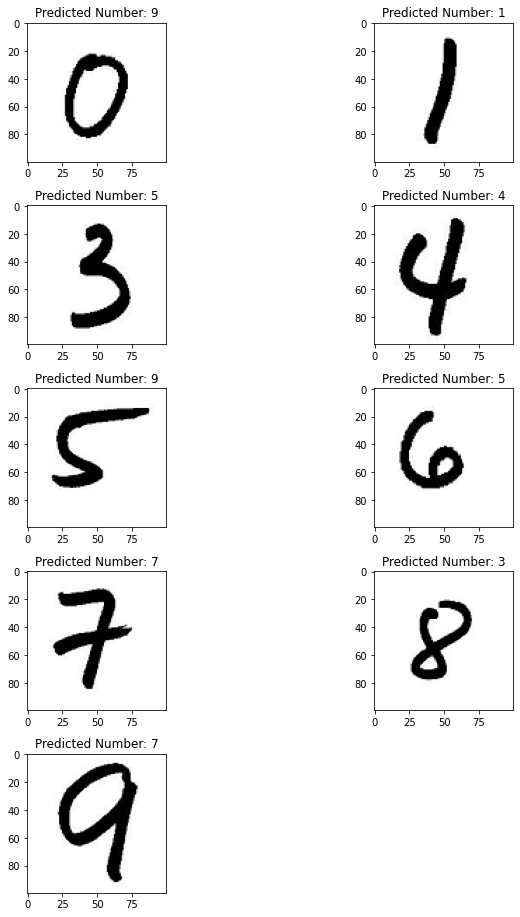

In [33]:
path = "./data/"
files = [f for f in listdir(path) if f.endswith("png")]
i = 1
for file in files:
    predict(cv2.imread(path + file),i)
    i = i+1